In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from ripser import Rips
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
%matplotlib inline

In [4]:
! pip install -U pandas

Requirement already up-to-date: pandas in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: pytz>=2011k in /usr/local/lib/python2.7/dist-packages (from pandas)
Requirement already up-to-date: numpy>=1.12.0 in /usr/local/lib/python2.7/dist-packages (from pandas)
Requirement already up-to-date: python-dateutil>=2.5.0 in /usr/local/lib/python2.7/dist-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /usr/local/lib/python2.7/dist-packages (from python-dateutil>=2.5.0->pandas)
You are using pip version 9.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Load Data

In [5]:
feat_cols = ['feat-{}'.format(i) for i in range(256)]
class_cols = ['class-{}'.format(i) for i in range(121)]

In [6]:
train_embed = pd.read_csv('train_embeds.csv', names=feat_cols)
train_label = pd.read_csv('train_labels.csv', names=class_cols)

# PCA

In [7]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_embed[feat_cols].values)

In [8]:
train_embed['pca-one'] = pca_result[:,0]
train_embed['pca-two'] = pca_result[:,1] 
train_embed['pca-three'] = pca_result[:,2]

In [9]:
print 'Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)

Explained variation per principal component: [0.09865423 0.04261377 0.03305932]


In [10]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(train_embed.shape[0])

### Get Integer Labels

In [11]:
labels = [train_label.iloc[i,:].to_string(header=False, index=False) for i in range(len(train_label))]

In [12]:
labels_set = set(labels)
print 'Number of Unique Labels: {}'.format(len(labels_set))

Number of Unique Labels: 3411


In [13]:
label2int = dict([(y,x+1) for x,y in enumerate(labels_set)])

In [14]:
train_embed['y'] = pd.Series([label2int[x] for x in labels])

## 2D Projection

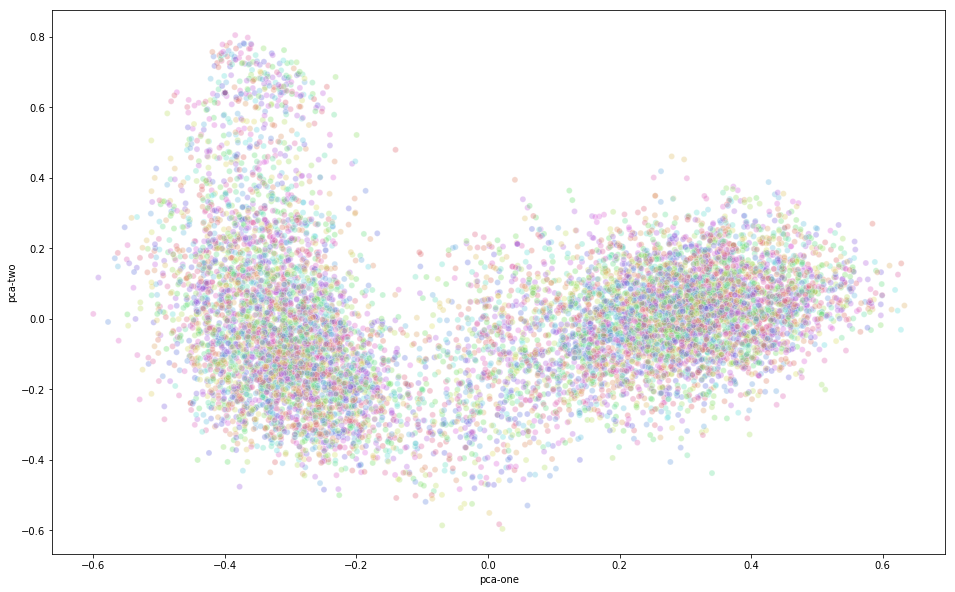

In [15]:
n_color = len(train_embed.loc[rndperm]['y'].unique())
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", n_color),
    data=train_embed.loc[rndperm,:],
    legend=False,
    alpha=0.3
)

## 3D Projection

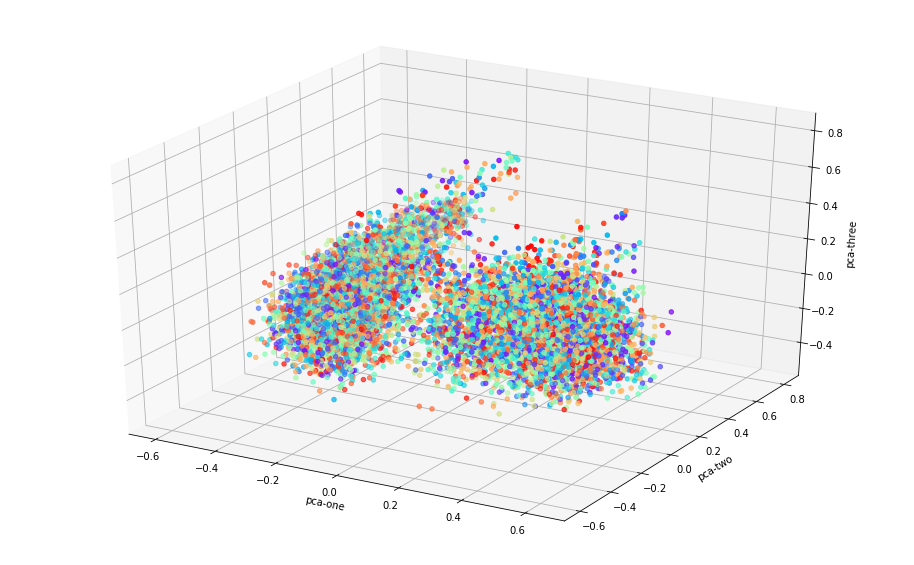

In [16]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=train_embed.loc[rndperm,:]["pca-one"], 
    ys=train_embed.loc[rndperm,:]["pca-two"], 
    zs=train_embed.loc[rndperm,:]["pca-three"], 
    c=train_embed.loc[rndperm,:]["y"],
    cmap='rainbow'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# Ripser

In [17]:
train_embed.shape

(9716, 260)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


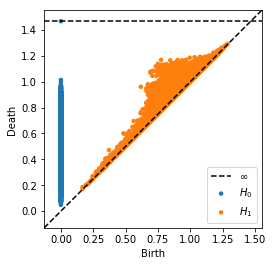

In [18]:
rips = Rips()
diagrams = rips.fit_transform(train_embed.drop(columns=['pca-one', 'pca-two', 'pca-three', 'y']))
rips.plot(diagrams)